#Topic: Relationship between GDP per capita, Air Transport freight Volume, Greenhouse Gas Emissions

we have used **wbgapi** from world bank data to understand relationship between GDP per capita and Greenhouse gases emissions



In [ ]:
!pip install wbgapi

In [ ]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt



*   We looked into the World bank api (wbgapi) to see which report would be useful for understanding the relationship between GDP per capita and greenhouse gase emissions and Air Transport Freight Volume.          

*  We found Country Climate and Development Report (CCDR) as the most useful
report for this purpose.



In [ ]:
wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2023-10-26
3,Worldwide Governance Indicators,WGI,3,2023-09-29
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2023-10-12
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-10-30
15,Global Economic Monitor,GEM,3,2023-07-21


The Database used is Country Climate and Development Report, therefore db = 87 as seen in the series information.


In [ ]:
wb.series.info(db=87)

id,value
account.t.d,Account (% age 15+)
account.t.d.7,"Account, income, poorest 40% (% ages 15+)"
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.FRST.ZS,Share of surface occupied by forest (% of total)
CC.ACLD.PRTS.NO,Total protests and riots since 2018
CC.ADPO.MAEX.AA,"Additional population exposed to annual coastal floods due to sea level rise, as a share of actual population (%) - Min. exposure, 2100"
CC.ADPO.MAEX.BB,"Additional population exposed to annual coastal floods due to sea level rise, as a share of actual population (%) - Max exposure, 2100"
CC.ADPO.MIEX.AA,"Additional population exposed to annual coastal floods due to sea level rise, as a share of actual population (%) - Min. exposure, 2050"
CC.ADPO.MIEX.BB,"Additional population exposed to annual coastal floods due to sea level rise, as a share of actual population (%) - Max exposure, 2050"


Using the **search attribute**, We tried to find the series related to **GDP per capita**

In [ ]:
wb.search("GDP")

ID,Name,Field,Value
UZB,,PPPsurveyyear,"2017 (Experimental survey for individual consumption expenditure by households), 2017 GDP PPPs and 2011 PPPs are imputed by a regression model"
ID,Name,Field,Value
TLS~EG.EGY.PRIM.PP.KD,,Country-Series,"...based on UN Energy Statistics (2014); World Development Indicators, WDI (2014). GDP data excludes oil output...."
TLS~NY.GDP.COAL.RT.ZS,,Country-Series,GDP data excludes oil output.
TLS~NY.GDP.FRST.RT.ZS,,Country-Series,GDP data excludes oil output.
TLS~NY.GDP.MINR.RT.ZS,,Country-Series,GDP data excludes oil output.
TLS~NY.GDP.NGAS.RT.ZS,,Country-Series,GDP data excludes oil output.
TLS~NY.GDP.PETR.RT.ZS,,Country-Series,GDP data excludes oil output.
TLS~NY.GDP.TOTL.RT.ZS,,Country-Series,GDP data excludes oil output.
TLS~SE.XPD.TOTL.GD.ZS,,Country-Series,GDP does not include the income from petroleum.


 Using the **search attribute**, We tried to find the series related to **Greenhouse gas emissions**

In [ ]:
wb.search("Greenhouse gas")

ID,Name,Field,Value
AG.CON.FERT.PT.ZS,,Developmentrelevance,"...aphids. Further, excessive use of fertilizers emits significant quantities of greenhouse gas into the atmosphere. Over-fertilization of a vital nutrient can be detrimental,..."
AG.CON.FERT.ZS,,Developmentrelevance,"...aphids. Further, excessive use of fertilizers emits significant quantities of greenhouse gas into the atmosphere. Over-fertilization of a vital nutrient can be detrimental,..."
EG.ELC.LOSS.ZS,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....
EG.IMP.CONS.ZS,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....
EG.USE.COMM.CL.ZS,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....
EG.USE.CRNW.ZS,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....
EG.USE.ELEC.KH.PC,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....
EG.USE.PCAP.KG.OE,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....
EN.ATM.CO2E.EG.ZS,,Developmentrelevance,...use changes and other industrial processes. It is the principal anthropogenic greenhouse gas that affects the Earth's radiative balance. It is the reference gas against...
EN.ATM.CO2E.GF.KT,,Developmentrelevance,...use changes and other industrial processes. It is the principal anthropogenic greenhouse gas that affects the Earth's radiative balance. It is the reference gas against...


 Using the **search attribute**, We tried to find the series related to **air transport**

In [ ]:
wb.search("air transport")

ID,Name,Field,Value
IS.AIR.DPRT,,Developmentrelevance,...The air transport industry a vital engine of global socio-economic growth. It is of vital...
IS.AIR.DPRT,,IndicatorName,"Air transport, registered carrier departures worldwide"
IS.AIR.DPRT,,Limitationsandexceptions,...Countries submit air transport data to Civil Aviation Organization (ICAO) on the basis of standard...
IS.AIR.DPRT,,Statisticalconceptandmethodology,...The air transport data represent the total (international and domestic) scheduled traffic carried...
IS.AIR.GOOD.MT.K1,,Developmentrelevance,...The air transport industry a vital engine of global socio-economic growth. It is of vital...
IS.AIR.GOOD.MT.K1,,IndicatorName,"Air transport, freight (million ton-km)"
IS.AIR.GOOD.MT.K1,,Limitationsandexceptions,...The air transport data represent the total (international and domestic) scheduled traffic carried...
IS.AIR.PSGR,,Developmentrelevance,...The air transport industry a vital engine of global socio-economic growth. It is of vital...
IS.AIR.PSGR,,IndicatorName,"Air transport, passengers carried"
IS.AIR.PSGR,,Limitationsandexceptions,...The air transport data represent the total (international and domestic) scheduled traffic carried...


In [ ]:
wb.source.concepts(db=87)

{'economy': {'key': 'country', 'value': 'Country'},
 'series': {'key': 'series', 'value': 'Series'},
 'time': {'key': 'time', 'value': 'Time'}}

(we looked into south asian countries)

In [ ]:
wb.economy.coder(['India', 'Nepal', 'Bhutan','Pakistan', 'Afghanistan', 'Bangladesh', 'Maldives', 'Sri Lanka'])

ORIGINAL NAME,WBG NAME,ISO_CODE
India,India,IND
Nepal,Nepal,NPL
Bhutan,Bhutan,BTN
Pakistan,Pakistan,PAK
Afghanistan,Afghanistan,AFG
Bangladesh,Bangladesh,BGD
Maldives,Maldives,MDV
Sri Lanka,Sri Lanka,LKA


## Infortmation table: GDP per capita (US$) of South Asian Nations



In [ ]:
import pandas as pd

from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()


country_codes = ('MDV', 'IND', 'NPL', 'BTN', 'LKA', 'AFG', 'PAK', 'BGD')

pd = wb.data.DataFrame(['NY.GDP.PCAP.CD'], country_codes, time=range(2010, 2019), labels=True).transpose()
pd

economy,BGD,PAK,AFG,LKA,BTN,NPL,IND,MDV
Country,Bangladesh,Pakistan,Afghanistan,Sri Lanka,Bhutan,Nepal,India,Maldives
YR2010,776.859577,911.089996,554.594735,2836.974098,2194.12587,589.165435,1350.634457,7158.061411
YR2011,856.381887,1075.45102,621.912414,3248.040215,2491.273456,791.225577,1449.603301,7409.331704
YR2012,876.818007,1109.678735,663.141053,3351.892489,2470.072136,794.092559,1434.017978,7447.415454
YR2013,973.7739,1126.040776,651.987862,3643.832449,2409.439989,809.384458,1438.056995,8222.558022
YR2014,1108.514957,1173.392309,628.146804,3885.62361,2589.899141,827.744705,1559.863772,8872.128664
YR2015,1236.004398,1282.443026,592.476165,3990.353123,2695.636904,882.307663,1590.174322,9434.31191
YR2016,1659.962489,1468.822077,520.251955,4107.829762,2879.546572,880.224894,1714.279541,9640.319191
YR2017,1815.610191,1567.64062,530.149863,4388.201908,3240.706326,1027.965474,1957.969814,10063.00371
YR2018,1963.412707,1620.742596,502.057099,4360.584742,3210.707814,1161.53435,1974.37773,10823.610483


##Lineplot of GDP per capita of South Asian Nations


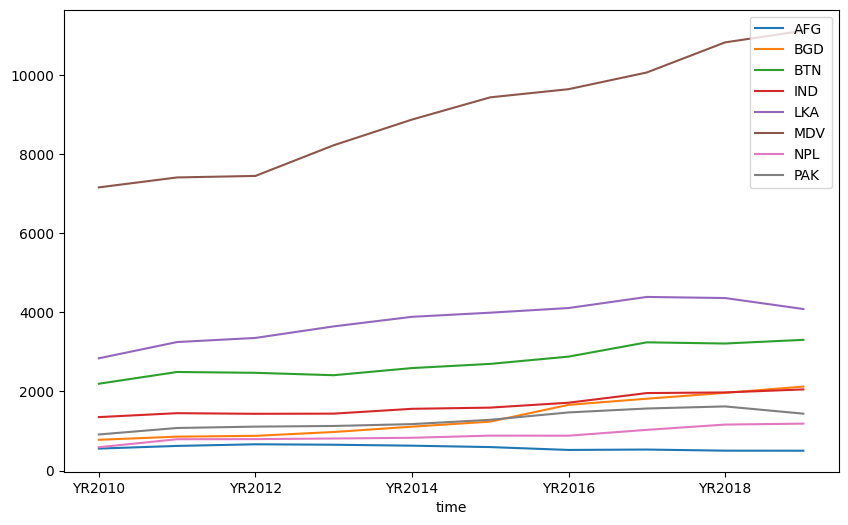

In [ ]:
wb.data.DataFrame('NY.GDP.PCAP.CD', ['MDV', 'IND', 'NPL', 'BTN', 'LKA', 'AFG', 'PAK', 'BGD'],
                  range(2010, 2020), index='time').plot(figsize=(10, 6))
plt.show()

#Interpretation
The graph indicates that throughout this time, GDP per capita grew in each of the eight nations. Nonetheless, each nation's growth pace was different. For instance, GDP per capita increased by 45.7% in India and only 10.6% in Afghanistan (Asian Development Bank, 2023)




#Greenhouse gas emissions information table of South Asian Countries


In [ ]:
import pandas as pd

country_codes = ['MDV', 'IND', 'NPL', 'BTN', 'LKA', 'AFG', 'PAK', 'BGD']

pd = wb.data.DataFrame(['EN.ATM.CO2E.PP.GD'], country_codes, time=range(2010, 2019), labels=True).transpose()
pd

economy,BGD,PAK,AFG,LKA,BTN,NPL,IND,MDV
Country,Bangladesh,Pakistan,Afghanistan,Sri Lanka,Bhutan,Nepal,India,Maldives
YR2010,0.117077,0.178664,0.171765,0.076049,0.107472,0.079356,0.317402,0.207106
YR2011,0.115886,0.171937,0.233703,0.080822,0.147128,0.084211,0.312678,0.196545
YR2012,0.111001,0.169779,0.171085,0.080413,0.150225,0.088701,0.310319,0.210467
YR2013,0.109456,0.165268,0.144558,0.062425,0.160012,0.083698,0.304504,0.183794
YR2014,0.10637,0.165536,0.134399,0.071773,0.162461,0.089939,0.316635,0.194789
YR2015,0.109924,0.167237,0.140016,0.075159,0.150693,0.088781,0.301408,0.175569
YR2016,0.111381,0.179191,0.132599,0.083686,0.159451,0.131712,0.283807,0.177059
YR2017,0.112153,0.187761,0.134152,0.079439,0.15763,0.134651,0.278944,0.172481
YR2018,0.111698,0.162408,0.141729,0.071071,0.165883,0.139438,0.272436,0.178951


#Lineplot of Greenhouse gas emissions of South Asia Countries


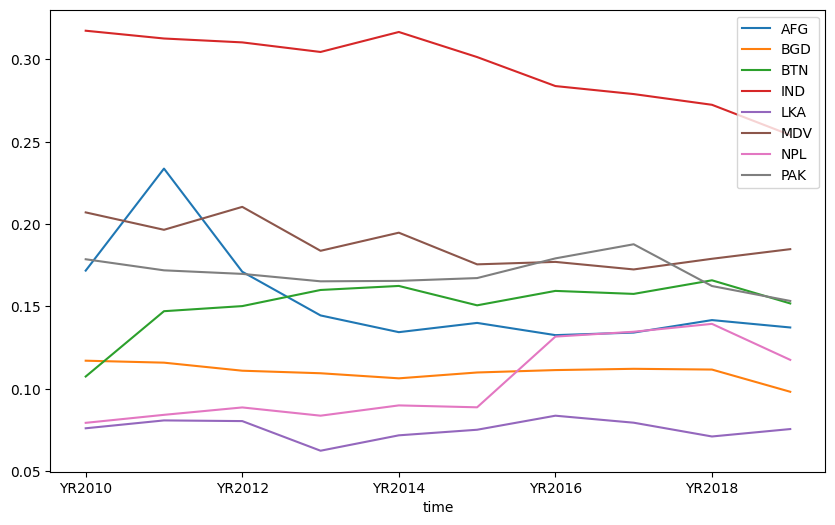

In [ ]:
wb.data.DataFrame('EN.ATM.CO2E.PP.GD', ['MDV', 'IND', 'NPL', 'BTN', 'LKA', 'AFG', 'PAK', 'BGD'],
                  range(2010, 2020), index='time').plot(figsize=(10, 6))
plt.show()

In [ ]:
pd = df.isnull().sum()
pd

Country Code                            0
Air transfer freight volume (tonnes)    0
GDP per capita (current US$)            0
dtype: int64

#Interpretation
South Asia's greenhouse gas emissions have been rising gradually, with India being mostly responsible for this growth. Between 2010 and 2020, South Asia's greenhouse gas emissions rose by an average of 2.5% year (CO2 Storage Resources and their development 2022).


#AIR TRANSPORT FREIGHTN VOLUME INFORMATION TABLE

# Air Transport Freight volume:  

Freight volume in air transport refers to the amount of cargo or goods that are transported by airplanes. It is typically measured in tonne-kilometers (tkm), which represents the total weight of the cargo multiplied by the distance it is transported.

In [ ]:
#airtransport - frieght volume data (remove missing data)
import pandas as pd

country_codes = ('MDV', 'IND', 'NPL', 'BTN', 'LKA', 'AFG', 'PAK', 'BGD')

pd = wb.data.DataFrame(['IS.AIR.GOOD.MT.K1'], country_codes, time=range(2010, 2019), labels=True).transpose()
pd

economy,BGD,PAK,AFG,LKA,BTN,NPL,IND,MDV
Country,Bangladesh,Pakistan,Afghanistan,Sri Lanka,Bhutan,Nepal,India,Maldives
YR2010,164.424639,332.957297,108.019487,339.048919,0.421938,6.463517,1630.964142,NaN
YR2011,159.692784,297.68352,109.421117,364.50263,0.483706,6.486565,1702.702702,NaN
YR2012,152.319037,286.075686,116.660723,405.42043,0.471,5.762375,1579.229879,NaN
YR2013,225.1869,292.760801,84.621216,385.12,0.635292,5.759868,1733.76172,NaN
YR2014,207.73842,204.623134,34.283472,384.708654,0.922884,4.5996,1851.32674,NaN
YR2015,57.009547,183.177313,33.102039,381.632053,0.538041,4.536372,1833.847614,5.878706
YR2016,53.979162,175.4744,29.010881,403.075584,0.659101,4.89508,1893.8815,6.8728
YR2017,61.749978,214.52857,21.462557,398.473464,0.530672,4.56684,2407.098107,7.745646
YR2018,50.616612,217.534134,29.559349,436.198,0.690916,8.84572,2703.964174,0.0


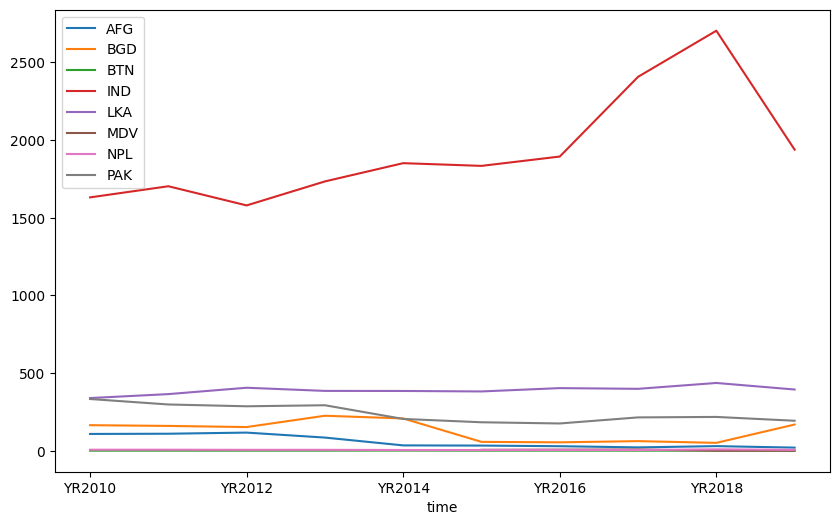

In [ ]:
wb.data.DataFrame('IS.AIR.GOOD.MT.K1', ['MDV', 'IND', 'NPL', 'BTN', 'LKA', 'AFG', 'PAK', 'BGD'],
                  range(2010, 2020), index='time').plot(figsize=(10, 6))
plt.show()

#Interpretation
The plot shows hat throughout this time, the volume of air freight transit increased in each of the eight countries. Nonetheless, each nation's growth pace was different. For instance, the volume of products transported by air increased by 102.4% in India but only by 29.4% in Afghanistan. (World Bank, 2023)

#Hypothesis 1 -

##Relation between GDP per capita and greenhouse gas emission in India

##Information table of India

In [ ]:
import pandas as pd

country_codes = [ 'IND']

pd = wb.data.DataFrame(['EN.ATM.CO2E.PP.GD','NY.GDP.PCAP.CD'], country_codes, time=range(2010, 2019), labels=True).transpose()
pd

series,EN.ATM.CO2E.PP.GD,NY.GDP.PCAP.CD
Series,CO2 emissions (kg per PPP $ of GDP),GDP per capita (current US$)
YR2010,0.317402,1350.634457
YR2011,0.312678,1449.603301
YR2012,0.310319,1434.017978
YR2013,0.304504,1438.056995
YR2014,0.316635,1559.863772
YR2015,0.301408,1590.174322
YR2016,0.283807,1714.279541
YR2017,0.278944,1957.969814
YR2018,0.272436,1974.37773


#Scatter plot

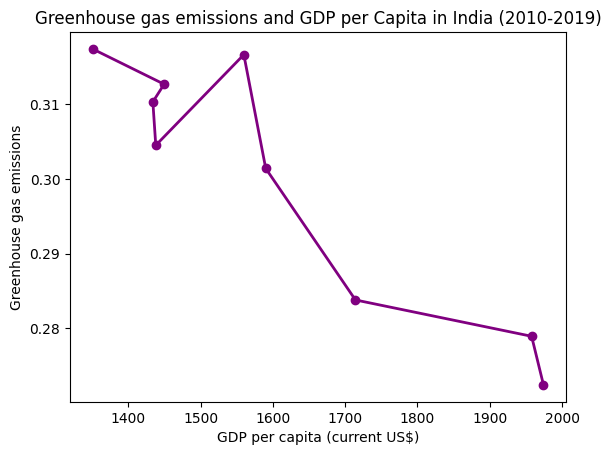

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({'NY.GDP.PCAP.CD': [1350.63445681517, 1449.60330101065, 1434.01797842656, 1438.05699513067,1559.86377161811,1590.17432166504, 1714.2795405846,1957.96981368095,1974.37773014516 ],
                   'EN.ATM.CO2E.PP.GD': [0.317402011719562, 0.312677990852934, 0.310319156689881,0.304503906185997 , 0.316634720476535,0.301408378049215, 0.283807113262758,0.278944392862765 , 0.27243625610552 ]})
plt.plot(df['NY.GDP.PCAP.CD'], df['EN.ATM.CO2E.PP.GD'], marker='o', linewidth=2, c='purple', linestyle='-')

plt.title('Greenhouse gas emissions and GDP per Capita in India (2010-2019)')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Greenhouse gas emissions')

plt.show()


In [ ]:
df.keys()


Index(['Country Code', 'GDP per capita (current US$)',
       'Greenhouse gas emissions (metric tons per capita)'],
      dtype='object')

#Interpretation 1-
This plot shows that relationship between CO2 emissions from transport and GDP per capita in India from 2010 to 2019. The graph has a positive correlation between greenhouse gas emissions and GDP per capita. This is indicating that the emissions tend to rise with the growth in GD PWorld Bank. (2023)
  



#Hypothesis 2 -
Relationship between GDP per capita and Air transport Freight Volume


In [ ]:
import pandas as pd

country_codes = [ 'IND']

pd = wb.data.DataFrame(['NY.GDP.PCAP.CD','IS.AIR.GOOD.MT.K1'], country_codes, time=range(2010, 2019), labels=True).transpose()
pd

series,NY.GDP.PCAP.CD,IS.AIR.GOOD.MT.K1
Series,GDP per capita (current US$),"Air transport, freight (million ton-km)"
YR2010,1350.634457,1630.964142
YR2011,1449.603301,1702.702702
YR2012,1434.017978,1579.229879
YR2013,1438.056995,1733.76172
YR2014,1559.863772,1851.32674
YR2015,1590.174322,1833.847614
YR2016,1714.279541,1893.8815
YR2017,1957.969814,2407.098107
YR2018,1974.37773,2703.964174


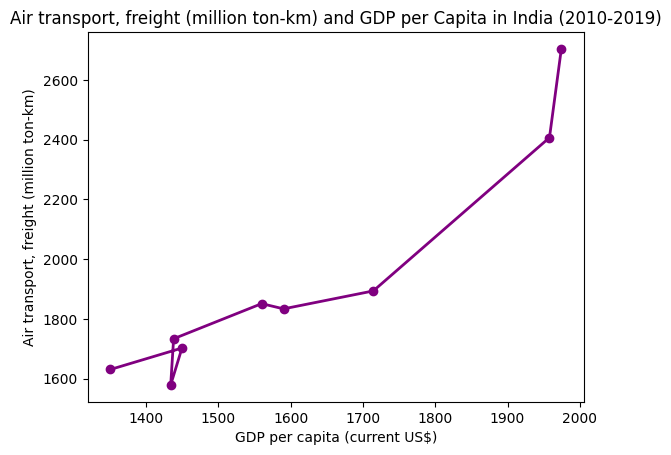

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame({'NY.GDP.PCAP.CD': [1350.63445681517, 1449.60330101065, 1434.01797842656, 1438.05699513067,1559.86377161811,1590.17432166504, 1714.2795405846,1957.96981368095,1974.37773014516 ],
                   'IS.AIR.GOOD.MT.K1': [1630.96414222155, 1702.702702,1579.229879,1733.76172 ,1851.32674 , 1833.847614,1893.8815, 2407.098107,2703.96417383 ]})

# Create a scatter plot with the points connected
plt.plot(df['NY.GDP.PCAP.CD'], df['IS.AIR.GOOD.MT.K1'], marker='o', linewidth=2, c='purple', linestyle='-')

# Add title and labels
plt.title('Air transport, freight (million ton-km) and GDP per Capita in India (2010-2019)')
plt.xlabel('GDP per capita (current US$)')
plt.ylabel('Air transport, freight (million ton-km)')

# Show the plot
plt.show()


#INTERPRATION 2-
As per the data retrieved from the World Bank. (2023) we can observe that the scatter plot conveys a positive between air transport and GDP per capita. This means that an increase in GDP increases the air transport freight volume. The International Civil Aviation Organization (ICAO). (2022) data suggest that the positive correlation is due to increased trade as air freight is a part of international trade. Additionally, air freight is also a main factor in the transportation of goods within the nation, which improves efficiency and connectivity and improves economic development.

#Overall Data Set Information table
a compilation of all three data reports. OveralL relationship between GDP per capita, Greenhouse gas emissions, and Air transport Frieght volume.

In [ ]:
import pandas as pd

country_codes = ['MDV', 'IND', 'NPL', 'BTN', 'LKA', 'AFG', 'PAK', 'BGD']

pd = wb.data.DataFrame(['NY.GDP.PCAP.CD', 'EN.ATM.CO2E.PP.GD', 'IS.AIR.GOOD.MT.K1'], country_codes, time=range(2010, 2019), labels=True)
pd

,,Country,Series,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018
economy,series,,,,,,,,,,,
BGD,NY.GDP.PCAP.CD,Bangladesh,GDP per capita (current US$),776.859577,856.381887,876.818007,973.773900,1108.514957,1236.004398,1659.962489,1815.610191,1963.412707
PAK,NY.GDP.PCAP.CD,Pakistan,GDP per capita (current US$),911.089996,1075.451020,1109.678735,1126.040776,1173.392309,1282.443026,1468.822077,1567.640620,1620.742596
AFG,NY.GDP.PCAP.CD,Afghanistan,GDP per capita (current US$),554.594735,621.912414,663.141053,651.987862,628.146804,592.476165,520.251955,530.149863,502.057099
LKA,NY.GDP.PCAP.CD,Sri Lanka,GDP per capita (current US$),2836.974098,3248.040215,3351.892489,3643.832449,3885.623610,3990.353123,4107.829762,4388.201908,4360.584742
BTN,NY.GDP.PCAP.CD,Bhutan,GDP per capita (current US$),2194.125870,2491.273456,2470.072136,2409.439989,2589.899141,2695.636904,2879.546572,3240.706326,3210.707814
NPL,NY.GDP.PCAP.CD,Nepal,GDP per capita (current US$),589.165435,791.225577,794.092559,809.384458,827.744705,882.307663,880.224894,1027.965474,1161.534350
IND,NY.GDP.PCAP.CD,India,GDP per capita (current US$),1350.634457,1449.603301,1434.017978,1438.056995,1559.863772,1590.174322,1714.279541,1957.969814,1974.377730
MDV,NY.GDP.PCAP.CD,Maldives,GDP per capita (current US$),7158.061411,7409.331704,7447.415454,8222.558022,8872.128664,9434.311910,9640.319191,10063.003710,10823.610483
BGD,EN.ATM.CO2E.PP.GD,Bangladesh,CO2 emissions (kg per PPP $ of GDP),0.117077,0.115886,0.111001,0.109456,0.106370,0.109924,0.111381,0.112153,0.111698


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


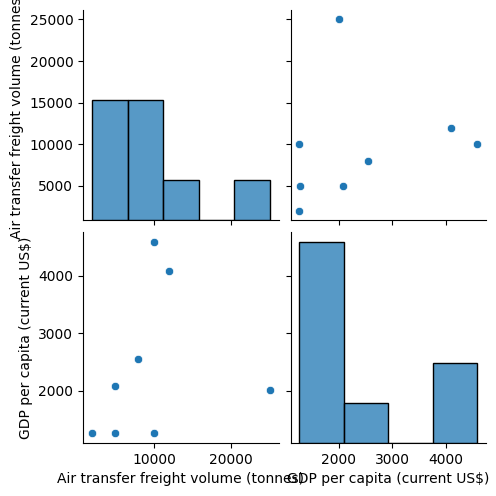

In [ ]:
sns.pairplot(df)

#Final Interpretation-
The pairplot shows that there is a positve correlation between the GDP per capita and Green house gas emissions and a negative correlation between GDP per capita and Air transport freight volume.
A study by Harbaugh, Levinson, and Wilson (2002) revealed a pattern where air pollution initially rises with a country's economic growth, but this trend eventually reverses as the country transitions to cleaner technologies and industries. This shows the postive correlation between Gdp and Greenhouse gas emissions.

The Efficiency of Air Freight: A Global Perspective" by the World Economic Forum (2017),  briefed  that air freight is becoming more efficient due to technological advancements and supply chain modifications. As countries grow wealthier, they may transition away from labor-intensive industries that rely on air freight towards more capital-intensive industries that utilize air freight less.This shows the neagtive correlation of GDP Per capita and Air transport freight volume.


#Conclusion

Our research shows a positive relation between the GDP per capita and Greenhouse gas emissions and a negative correlation between GDP per capita and Air transport freight volume. This leads to an understanding that with an increase in GDP per capita there is also increase in the Greenhouse gas emissions.

After researching from World bank, we found several reasons for this correlation:


*   increasing industrial activity

*   Urbanization

*   dependance on fossil fuels

*    lack of investement in renewable resources

(Climate Change, n.d.)

*  Shifting economic structure (World Air Freight Traffic 2008-15 2017)






#References
IEA (2020), Energy Efficiency 2020, IEA, Paris https://www.iea.org/reports/energy-efficiency-2020, License: CC BY 4.0

Harbaugh, W., Levinson, A. and Wilson, D. (2000) Reexamining the empirical evidence for an Environmental Kuznets curve, NBER. Available at: https://www.nber.org/papers/w7711
(2017) World Air Freight Traffic 2008-15. doi:10.1787/9789282108000-graph7-en.

Asian Development Bank. (2023). Asian Development Outlook 2023. Retrieved from https://www.adb.org/publications/asian-development-outlook-2023

International Civil Aviation Organization (ICAO). (2022). Air transport statistics yearbook.Statistics. Available at: https://www.icao.int/sustainability/Pages/Statistics.aspx

World Bank. (2023).https://data.worldbank.org/indicator
